# Classifying hand-written digits
(Using the classic "MNIST" data set)

Notebook by Stephen Becker, July 17 2019

The first part of this uses a bit of code from https://medium.com/the-andela-way/applying-machine-learning-to-recognize-handwritten-characters-babcd4b8d705, written by Brice Nkengsa (his code at https://github.com/briceicle/capstone/blob/master/model.py and data at https://github.com/briceicle/capstone/tree/master/data )

Requires Pillow (PIL) package: run `pip3 install Pillow` or similar
Also needs `tkinter` package

Note: the self-drawing of `tkinter` will not work on JupyterHub (maybe someone can make a version based on `ipywidgets` which does), so ask to borrow the instructor's computer to run it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import svm

from joblib import dump, load # to save, load trained scikit-learn models

In [2]:
# Load the training data (about 75 MB, so takes a little while!)
# data_url = "https://github.com/briceicle/capstone/raw/master/data/train.csv"
# data = pd.read_csv(data_url)
# data.shape # 42,000 examples, each 784 (=28^2), so 785 columns (1st column is label)

# or, to save time, load a subset of train.csv that we prepared:
data = pd.read_csv('data/trainMNIST_small.csv')
# or
#data = pd.read_csv('https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/machine_learning/data/trainMNIST_small.csv')
data.shape  # 100 examples, 785 columns

(100, 785)

In [3]:
# Extract feature columns
feature_cols = list(data.columns[1:])

# Extract target column 'label'
target_col = data.columns[0]

# Separate the data into feature data and target data (X and y, respectively)
X_train = data[feature_cols]
y_train = data[target_col]


In [4]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Load the pre-trained model
clf = load('data/trained_MNIST_SVM.joblib')

In [6]:
def plotAndEstimate( image ):
    # .shape gives (28,28) whereas .size gives 784
    imageSquare = image.reshape( 28, 28 )
    imageFlat   = image.flatten()
    plt.imshow( imageSquare, cmap=matplotlib.cm.gray.reversed() )
    digit = clf.predict( [imageFlat] )[0]
    print("Estimated digit is: ", digit )
    return

Estimated digit is:  9


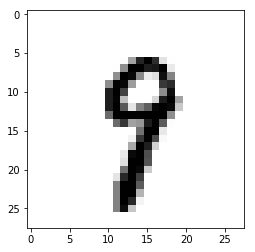

In [7]:
ind = 29  # try different values, starting at 0
sampleRow = X_train.iloc[ind].values
plotAndEstimate( sampleRow )

In [8]:
# Run SVM classification algorithm, takes about 2 minutes
# clf = svm.LinearSVC()
# clf.fit(X_train, y_train)
# clf.score( X_train, y_train )  # how well did we do on the training data? about 88% accuracy

# Now, save the pre-trained model, so that not everyone has to train the model
#  and download the data (this will reduce the computational demand).
# See https://scikit-learn.org/stable/modules/model_persistence.html

# dump(clf, 'data/trained_MNIST_SVM.joblib')  # less than 1 MB

## Try classifying our own handwritten digits
Instructions: use MSPaint, or this online version https://jspaint.app, and first resize the canvas to a 20 x 20 array. Then use the pencil tool to draw your digit.  Save it as a png. Below, we'll use some images that I premade, as a demo.

If you're adventurous, take a picture with your phone, then crop it to be a square and resize to 20 x 20, and convert from a JPEG to a PNG file.  See if that works!

In [12]:
# from PIL import Image  # Python Image Library - Image Processing.  Use `pip3 install Pillow` or similar
# from PIL import ImageOps
# see https://pillow.readthedocs.io/en/stable/ for documentation

# or, use
#import matplotlib.image as mpimg
#im = mpimg.imread('image.png')

# from PIL import ImageTk, Image, ImageDraw, ImageOps
# import PIL
#import tkinter


In [8]:
from PIL import ImageTk, Image, ImageDraw, ImageOps
import PIL
# -- Load the file --
file = 'data/myDigit2.png' # already 20 x 20, no need to resize
# file = 'data/myDigit.png'  # this is square, but 266 x 266, so needs to be resized
im = Image.open(file).convert('L')  # open, then convert to black & white
im = ImageOps.invert( im ) # flip black/white
# -- Resize image if needed --
if im.size != (20, 20):
    print('Resizing image. Warning: you need to make sure the lines were thick enough!')
    im = im.resize( (20,20) ) #, resample =  Image.BICUBIC)
# -- Center the image --
# The images should be centered. For now, we are not going to do this,
#   so try to make sure images are already centered.
# -- Pad the image --    
# We need to pad the image from 20 x 20 to 28 x 28 by adding white borders
# (see http://yann.lecun.com/exdb/mnist/ )
new_im = ImageOps.expand(im, 4, fill=0)
new_im.size  # now it's 28 x 28
im   # shows the image

Estimated digit is:  3


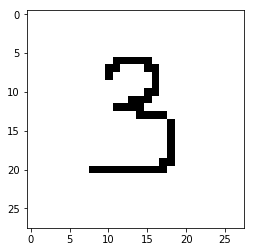

In [9]:
# And run our classifier on it. Does it work??
plotAndEstimate( np.array( new_im ) )

from Yann LeCun's website: "The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field."

## Now, really draw your own digit
A small window will pop-up. Slowly draw in the window, then click "Save", and continue to the next cell.

In [16]:
# Execute this cell to make a pop-up window
# Code from: https://stackoverflow.com/a/55577055
from tkinter import *

width = 50  # canvas width
height = 50 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "myDigit3.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=3)
    draw.line([x1, y1, x2, y2],fill="black",width=3)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='gray')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

Resizing image. Warning: you need to make sure the lines were thick enough!
Estimated digit is:  2


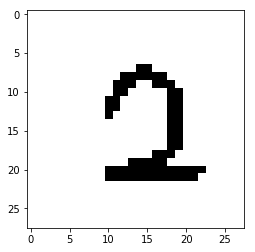

In [17]:
from PIL import ImageTk, Image, ImageDraw, ImageOps

file = 'myDigit3.png'
im = Image.open(file).convert('L')  # open, then convert to black & white
im = ImageOps.invert( im ) # flip black/white
# -- Resize image if needed --
if im.size != (20, 20):
    print('Resizing image. Warning: you need to make sure the lines were thick enough!')
    im = im.resize( (20,20) )
new_im = ImageOps.expand(im, 4, fill=0)
new_im.size 
plotAndEstimate( np.array( new_im ) )